In [32]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.stats import norm
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
import pandas as pd
import import_ipynb
from optimization_model import sample_mins_played, sample_goals_and_assists, predict_fixtures

### Load parameters

In [20]:
all_players_params = pd.read_csv("../parameters/all_players_params.csv")
all_teams_params = pd.read_csv("../parameters/all_teams_params.csv", header=None)
teams = pd.read_csv("../parameters/all_teams.csv", header=None).values[:, 0]

### Match-up

In [115]:
home_team = 'Arsenal'
away_team = 'Tottenham'
home_form = 10  # points in last 5 games
away_form = 2  # points in last 5 games

#### Sampling Team Performance

In [116]:
tp = all_teams_params.values
N = 50000

goals_home = np.zeros(N)
goals_away = np.zeros(N)
for i in range(N):
    params = np.zeros(np.shape(tp)[0])
    for j in range(np.shape(tp)[0]):
        params[j] = np.random.normal(tp[j, 0], tp[j, 1])
    mu = params[0]
    a = params[1:(len(teams) + 1)]
    d = params[(len(teams) + 1):((2 * len(teams)) + 1)]
    alpha = params[-1]
    result_lambdas = predict_fixtures(np.reshape(np.array([home_team, away_team]), ((1, 2))), np.reshape(np.array([home_form, away_form]), ((1, 2))),
                                      teams, mu, a, d, alpha)
    goals_home[i] = np.random.poisson(result_lambdas[0][0])
    goals_away[i] = np.random.poisson(result_lambdas[1][0])

---------------------
Chance of home win:  0.41296
Chance of draw:  0.24278
Chance of away win:  0.34426
---------------------


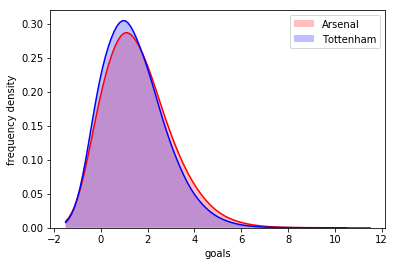

In [117]:
p1=sns.kdeplot(goals_home, shade=True, color="r", bw=0.5)
p1=sns.kdeplot(goals_away, shade=True, color="b", bw=0.5)
plot.xlabel("goals")
plot.ylabel('frequency density')
plot.legend([home_team, away_team])

print('---------------------')
print('Chance of home win: ', sum(goals_home > goals_away) / N)
print('Chance of draw: ', sum(goals_home == goals_away) / N)
print('Chance of away win: ', sum(goals_home < goals_away) / N)
print('---------------------')

#### Sampling player performance

-----------------------------
Chance of 1 goal:  0.23468
Chance of 2 goals:  0.05554
Chance of 3 goals:  0.0093
-----------------------------
-----------------------------
Chance of 1 assist:  0.08468
Chance of 2 assists:  0.00618
Chance of 3 assists:  0.00036
-----------------------------


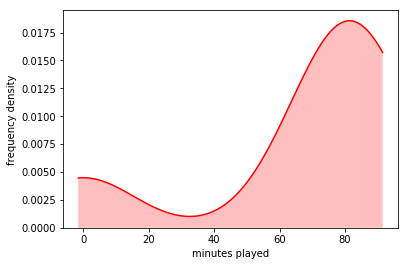

-----------------------------
Chance of clean sheet:  0.17768
-----------------------------


In [118]:
player = 'Harry Kane'
home_players = list(all_players_params.loc[all_players_params.index[all_players_params['team'] == home_team], 'player'])
away_players = list(all_players_params.loc[all_players_params.index[all_players_params['team'] == away_team], 'player'])
if (player not in home_players) and (player not in away_players):
    print('Player doesnt play for either home or away team')
else:
    
    team_player = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'team'].values[0]
    
    clean_sheets = np.zeros(N)
    mins_played = np.zeros(N)
    goals = np.zeros(N)
    assists = np.zeros(N)
    
    a_mins = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'a_mins'].values[0]
    b_mins = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'b_mins'].values[0]
    a_games = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'a_games'].values[0]
    b_games = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'b_games'].values[0]
    a_goals = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'a_goals'].values[0]
    b_goals = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'b_goals'].values[0]
    c_goals = all_players_params.loc[all_players_params.index[all_players_params['player'] == player], 'c_goals'].values[0]
    
    for i in range(N):
        mins_played[i] = sample_mins_played(a_mins, b_mins, a_games, b_games)
        clean_sheets[i] = (mins_played[i] >= 60) * (np.array([goals_home[i], goals_away[i]])[int(home_team == team_player)] == 0)
        goa, assi = sample_goals_and_assists(a_goals, b_goals, c_goals, int(np.array([goals_home[i], goals_away[i]])[int(away_team == team_player)]), mins_played[i])
        goals[i] = goa
        assists[i] = assi
    
    print('-----------------------------')
    print('Chance of 1 goal: ', sum(goals == 1) / N)
    print('Chance of 2 goals: ', sum(goals == 2) / N)
    print('Chance of 3 goals: ', sum(goals == 3) / N)
    print('-----------------------------')
    
    print('-----------------------------')
    print('Chance of 1 assist: ', sum(assists == 1) / N)
    print('Chance of 2 assists: ', sum(assists == 2) / N)
    print('Chance of 3 assists: ', sum(assists == 3) / N)
    print('-----------------------------')
    
    p1=sns.kdeplot(mins_played, shade=True, color="r", bw=0.5)
    plot.xlabel("minutes played")
    plot.ylabel('frequency density')
    plot.show()
    
    print('-----------------------------')
    print('Chance of clean sheet: ', sum(clean_sheets) / N)
    print('-----------------------------')